# Исследование данных магазина компьютерных игр

Проект посвящён исследованию исторических данных по играм для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. В датасете - данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Период информации - с 1980 по 2016 год. Нужно выявить закономерности, которые определяют успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

In [1]:
# загружаю все нужные для проекта библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Загрузка и изучение данных

In [2]:
# открываю и изучаю датасет по пользователям
try:
    data = pd.read_csv('/Users/ira-bobrineva/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть пропуски, типы данных тоже надо поправить. Поправлю ещё названия переменных.

## Предобработка

### Обработка названий переменных

In [4]:
# правлю стиль названий столбцов
data.columns = data.columns.str.lower()
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропущенных значений

In [5]:
data.isna().sum() # вывожу количество нулевых значений в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data.isna().mean() * 100 # подсчитываю долю пропусков по данным

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [7]:
# проверю, какие есть уникальные значения, чтобы было потом проще ориентироваться в данных
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В user_score есть значение 'tbd' - оно, скорее всего, расшифровывается как to be done. Заменю это значение на пустое, чтобы было легче проводить расчёты по столбцу.

In [8]:
# тут тоже проверю, какие есть уникальные значения, чтобы было потом проще ориентироваться в данных
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропущенные значения есть в следующих столбцах: name (название игры), year_of_release (год выпуска), genre (жанр), critic_score (оценка критиков), user_score (оценка пользователей), rating (рейтинг от организации ESRB).

Как можно заполнить пропуски:
* name - строки с пропущенными названиями игр можно удалить, значений всего 2.
* year_of_release - нельзя заполнить логически, но данных немного, можно удалить такие строки.
* genre - эти строки тоже можно удалить, значения всего 2. Скорее всего, это ещё те две игры, которые без названия. 
* critic_score - нельзя заполнить логически, оставляю пропуски.
* user_score - нельзя заполнить логически, оставляю пропуски.
* rating - это категориальная переменная, можно пропуски заменить на значение 'unknown'.

In [9]:
# удаляю строки без указания названия игры и года выпуска
data = data.dropna(subset=['name', 'year_of_release']).reset_index(drop=True) 
# заменяю значение tbd на пустое значение
data['user_score'] = data['user_score'].replace('tbd', np.nan)
# заполняю пропуски в rating значением 'unknown'
data['rating'] = data['rating'].fillna('unknown')

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### Обработка типов данных

Надо исправить типы данных у года выпуска и рейтинга пользователей. Год станет int16, потому что там только целые небольшие значения,  а user_score - числом с плавающей точкой, потому что там есть дробные числа.

In [12]:
# создаю словарь, чтобы поправить типы данных
data_dict = {'year_of_release': 'int16', 'user_score': float}
data = data.astype(data_dict)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.3+ MB


### Добавление столбца с продажами

In [13]:
# добавлю столбец с мировыми продажами по каждой игре
data['total_sum'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Проверка дубликатов

In [14]:
# на всякий случай проверю дубликаты в данных

data.duplicated().sum()

0

In [15]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В столбцах с рейтингами было много пропусков. В целом, пользовательский рейтинг и рейтинг от критиков может быть не заполнен просто потому, что эту игру действительно не оценивали. Можно ещё попробовать поискать другие источники или как-то стимулировать своих пользователей давать отзывы играм. Нули в столбце с рейтингом ESRB могут быть из-за того, что этот рейтинг появился только в 1994 году. Много игр до этого года, возможно, без рейтинга. Ну, и тут тоже стоит проверить источник. Всё-таки рейтинг ESRB более официальный, чем оценка от игроков и критиков, странно, что его так много где нет. Пропуски в годах выпуска могут возникнуть из-за человеческого фактора (просто забыли указать) или опять-таки какие-то проблемы с источником.

## Исследовательский анализ данных

### Распределение игр по годам

In [17]:
# вывожу уникальные значения годов
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983], dtype=int16)

In [18]:
# строю сводную таблицу с годом и количеством игр, выпущенных в этот год
year_of_release = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_of_release.columns = ['Количество игр']
year_of_release = year_of_release.sort_values(by='Количество игр', ascending=False)
year_of_release

,Количество игр
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


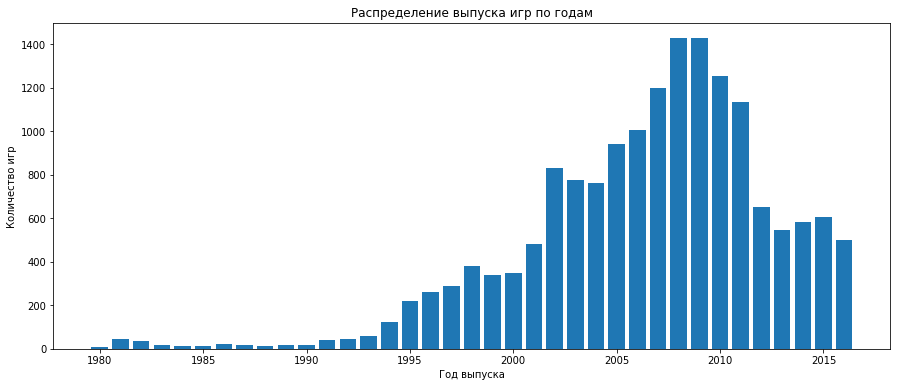

In [19]:
# вывожу столбчатую гистограмму по частоте выпуска игр

plt.figure(figsize=(15, 6))
plt.bar(year_of_release.index, year_of_release['Количество игр'])
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Распределение выпуска игр по годам')
plt.show()

Я бы начала рассматривать данные с 1995 года, когда стало отчётливо видно, что индустрия компьютерных игр пошла в гору. Прирост количества игр с 1994 года - почти в два раза. Но тут надо ещё понять, для каких целей нам нужно распределение. От этого дальше уже выбирать нужные для анализа года.

### Продажи по платформам по годам

In [20]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [21]:
# вывожу сводную таблицу по платформам и проданным для этих платформ играм
platform_sales = data.pivot_table(index='platform', values='total_sum', aggfunc='sum')
platform_sales.columns = ['Количество проданных игр']
platform_sales = platform_sales.sort_values(by='Количество проданных игр', ascending=False)
platform_sales

,Количество проданных игр
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [22]:
# вывожу топ самых популярных платформ
platform_sales.head(6)


,Количество проданных игр
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


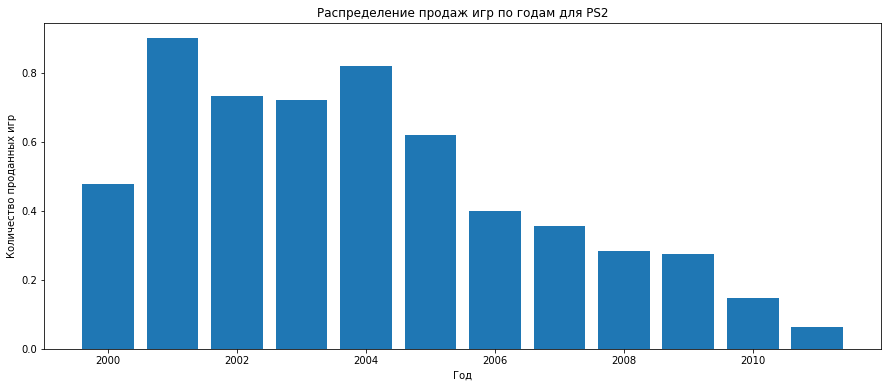

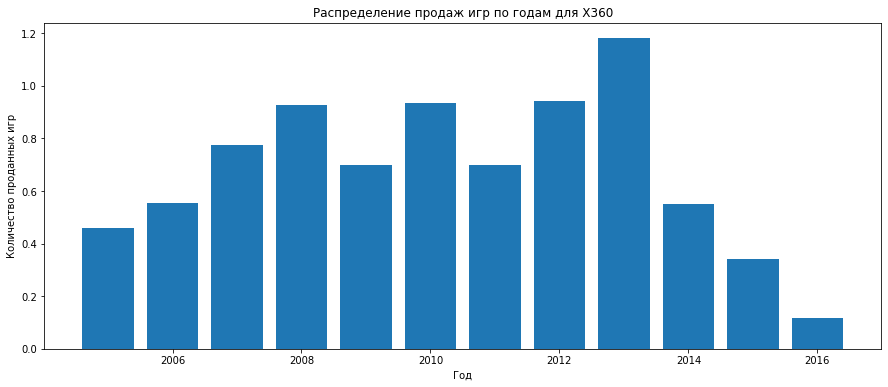

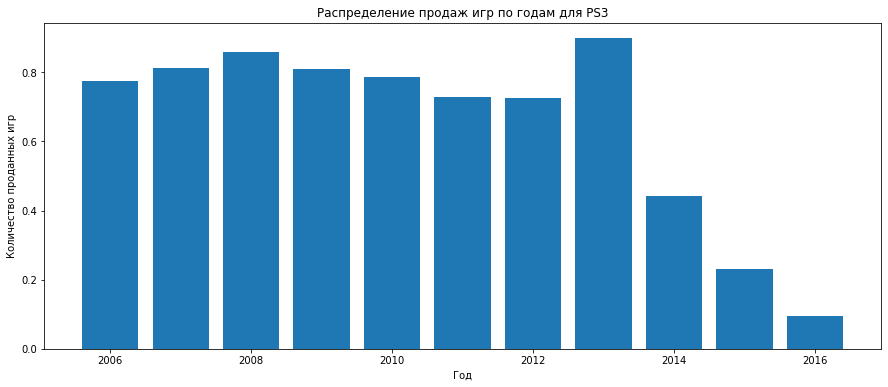

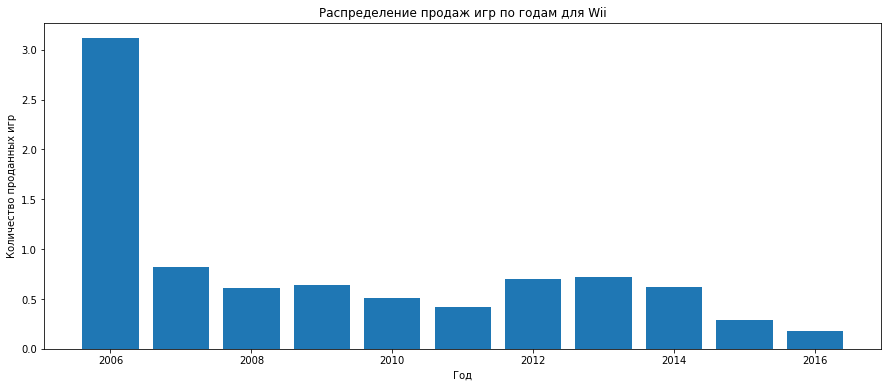

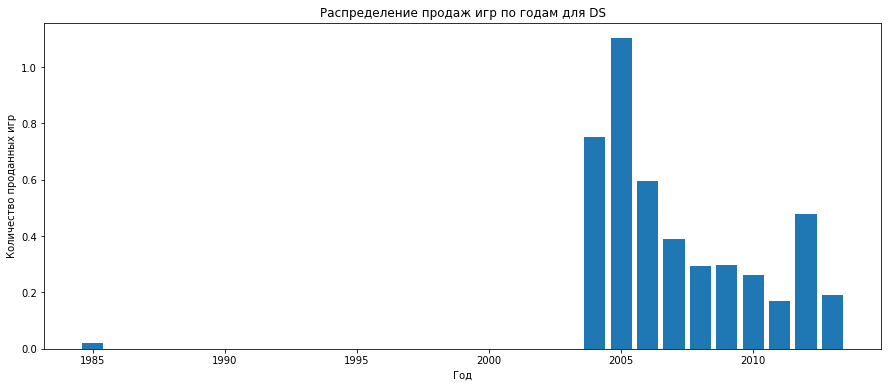

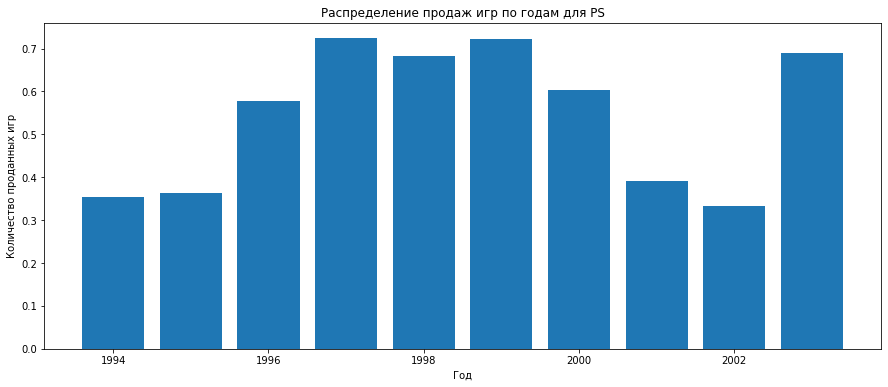

In [23]:
# срез с самыми популярными платформами
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
subset = data[data['platform'].isin(top_platforms)]

# задаю функцию, которая будет строить графики распределения продаж игр по годам по платформам
def plot_sales(data, x_label, y_label, title):
    plt.figure(figsize=(15, 6))
    plt.bar(data.index, data['total_sum'])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
# строю цикл по приставкам
for platform in top_platforms:
    # выделение среза данных по приставке
    platform_data = subset[subset['platform'] == platform]
    # построение таблицы с годами и количеством продаж по платформе
    platform_sales = platform_data.pivot_table(index='year_of_release', values='total_sum')
    # построение гистограммы
    plot_sales(platform_sales, 'Год', 'Количество проданных игр', f'Распределение продаж игр по годам для {platform}')


* Пик популярности PS2 пришёлся на 2001 - 2004 года, затем её популярность начала снижаться. После 2011 года для этой платформы уже не продавали игры. По Википедии: «Игровая приставка стала наиболее быстро продаваемой и самой популярной игровой консолью в истории». Это даёт ответ на вопрос, почему она в топе всех платформ, хотя её поддержка закончилась около 10-х годов.
* X360 запустилась в 2005 году, до 2012 игры для этой платформы достаточно стабильно продавались. Пик популярности пришёлся на 2013 год, затем её популярность начала снижаться. В 2016 году - самый низкий показатель продаж. 
* Игры для PS3 стабильно хорошо продавались до 2013 года. Затем пошло резкое снижение. В 2016 - самый низкий показатель. Снижение популярности приставки связано с тем, что в 2013 году вышла новая версия - PS4.
* Пик популярности Wii - 2006 год, затем - резкое снижение. В 2016 - самый низкий показатель продаж.
* Пик популярности DS - 2005 год. Продажи по платформе есть до 2013 года, но показатели в целом низкие. Есть выброс в 1985 году. Возможно, тогда запускали на рынок прототип, либо в исходных данных какая-то ошибка.
* Пик популярности PS - 1997-1999 года. Продажи по платформе есть до 2003 года.

В среднем платформы живут по 10-11 лет. Но новые версии приставок выходят достаточно быстро, поэтому особенно прибыльными платформы остаются 3-4 года.

### Определение актуального периода для прогноза

Игровая индустрия очень динамичная, в ней достаточно быстро появляются новинки. Думаю, можно взять данные за 2014, 2015 и 2016 года, чтобы спрогнозировать продажи на 2017 год. Если бы данные за 2016 год были полными, то можно было бы обойтись только двумя годами.

In [24]:
# выделяю срез с данными за нужный период
actual_data = data[data['year_of_release'] >= 2014].reset_index(drop=True) 
actual_data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


In [25]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int16  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sum        1689 non-null   float64
dtypes: float64(7), int16(1), object(4)
memory usage: 148.6+ KB


### Потенциально прибыльные платформы

In [26]:
# вывожу таблицу с количеством проданных игр по платформам
platform_sales_v2 = actual_data.pivot_table(index='platform', values='total_sum', aggfunc='sum')
platform_sales_v2.columns = ['Количество проданных игр']
platform_sales_v2 = platform_sales_v2.sort_values(by='Количество проданных игр', ascending=False)
platform_sales_v2

,Количество проданных игр
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


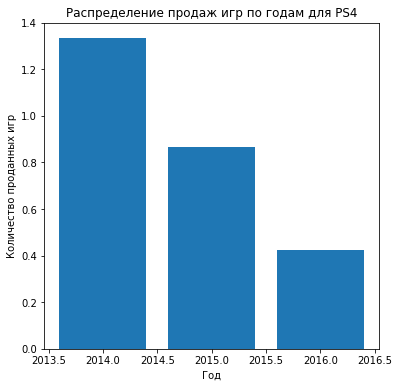

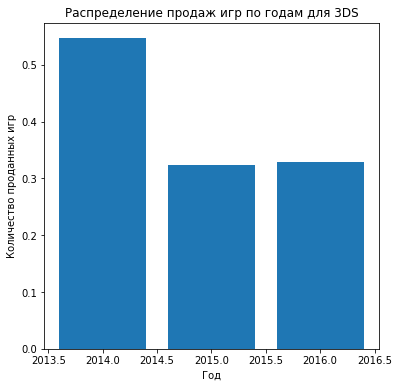

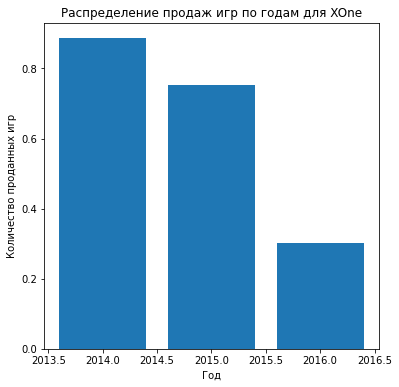

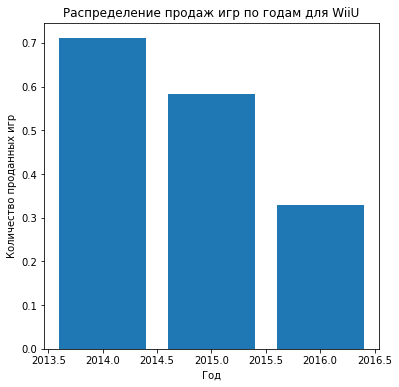

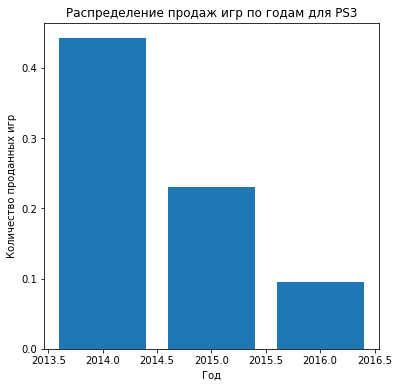

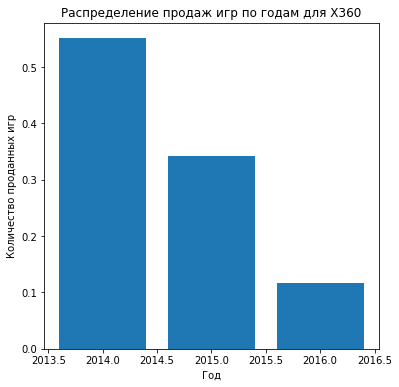

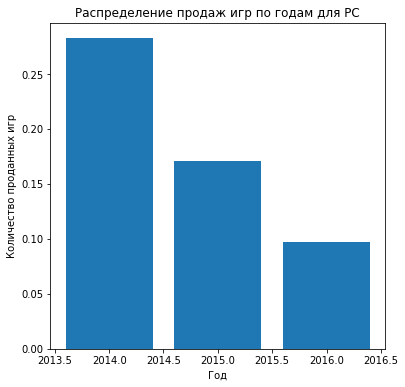

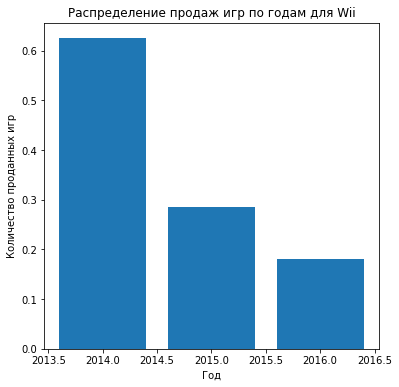

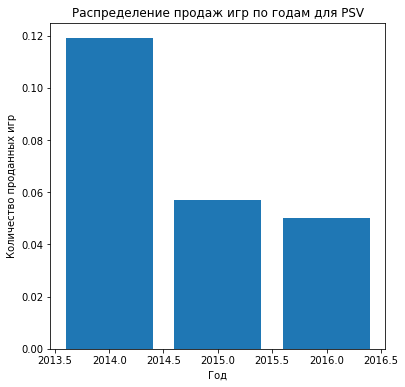

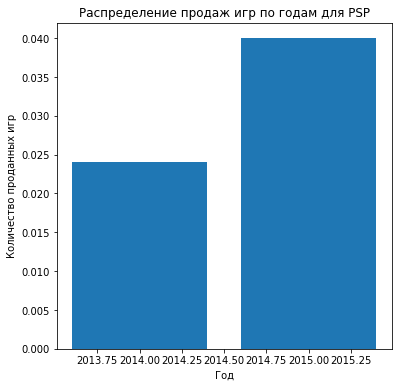

In [27]:
# выделяю список уникальных приставок

actual_platforms = actual_data['platform'].unique()

# задаю функцию, которая будет строить графики распределения продаж игр по годам по платформам
def plot_sales_2(data, x_label, y_label, title):
    plt.figure(figsize=(6, 6))
    plt.bar(data.index, data['total_sum'])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# строю цикл по приставкам
for platform in actual_platforms:
    # выделение среза данных по приставке
    platform_info = actual_data[actual_data['platform'] == platform]
    # построение таблицы с годами и количеством продаж по платформе
    platform_count = platform_info.pivot_table(index='year_of_release', values='total_sum')
    # построение гистограммы
    plot_sales_2(platform_count, 'Год', 'Количество проданных игр', f'Распределение продаж игр по годам для {platform}')


- Продажи по PS4 в 2014 году превысили 1 300 000 продаж. Это самый высокий показатель среди платформ. В 2016 году продажи гораздо ниже - около 400 000, но это всё равно высокий показатель относительно других платформ.
- Продажи по 3DS в 2014 были выше 500 000, но затем пошли на спад. Однако в 2016 заметен небольшой подъём по сравнению с 2015 годом — ближе к 350 000.
- Продажи по XOne в 2014 году были высокими — больше 800 000, но в 2016 слишком резкий спад — около 300 000 проданных копий.
- Продажи по WiiU в 2014 — около 700 000, затем постепенный спад. В 2016 году продано чуть больше 300 000 игр.
- Продажи по PS3 низкие и продолжают снижаться - с 450 000 копий в 2014 году до менее 100 000 в 2016. Непопулярность приставки объясняется тем, что есть более свежая версия приставки - PS4.
- Продажи по X360 такие же низкие, как и по PS3 - чуть больше 500 000 в 2014 году, но уже в 2016 — около 100 000.
- Продажи для PC стабильно низкие — меньше 300 000 в 2014, а в 2016 — около 100 000.
- Продажи для Wii меньше, чем для WiiU, потому что вторая приставка новее. В 2014 году для Wii продали около 600 000 копий, а в 2016 — меньше 200 000.
- PSV и PSP показывают самые низкие продажи. Для PSV в 2016 году продали меньше 60 000 копий игр, а для PSP — меньше 40 000. Хотя PSP показывает рост продаж в 2016 году, не думаю, что эта приставка снова станет прибыльной.

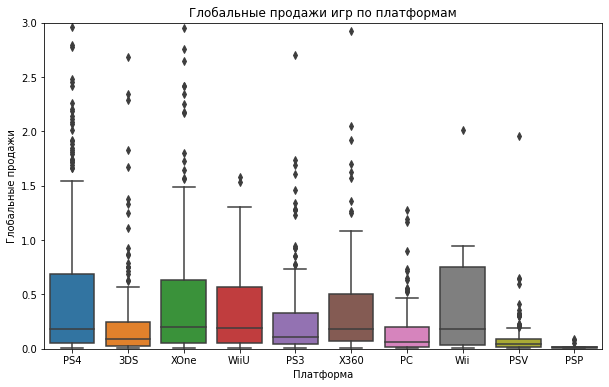

In [28]:
# вывожу распределения продаж по платформам, ограничиваю график, чтобы ящики были лучше видны
plt.figure(figsize=(10,6))
sns.boxplot(x='platform', y='total_sum', data=actual_data)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 3)
plt.show()

Судя по разбросам, потенциально прибыльные платформы - PS4, XOne, 3DS. На ящиках PS4 и XOne много выбросов, что говорит о том, что люди готовы покупать игры именно для этих приставок. 3DS тоже показывает много выбросов, но тут надо быть аккуратнее, потому что портативные приставки теряют актуальность быстрее, чем не портативные.

### Продажи vs отзывы критиков и пользователей на PS4

In [29]:
# выделяю срез со значениями по PS4
PS4_data = actual_data[actual_data['platform'] == 'PS4'].reset_index(drop=True) 
PS4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [30]:
# строю таблицу с рейтингом критиков и пользователей, а также количеством проданных копий по одной игре
games_review = PS4_data.pivot_table(index='name', values=['total_sum', 'critic_score', 'user_score'])
games_review.columns = ['Количество проданных копий', 'Рейтинг критиков', 'Рейтинг игроков']
games_review = games_review.sort_values(by='Количество проданных копий', ascending=False)
games_review

,Количество проданных копий,Рейтинг критиков,Рейтинг игроков
name,,,
Grand Theft Auto V,97.0,12.62,8.3
Metal Gear Solid V: The Phantom Pain,93.0,3.42,8.2
Uncharted 4: A Thief's End,93.0,5.39,7.9
Bloodborne,92.0,2.48,8.6
The Witcher 3: Wild Hunt,92.0,3.97,9.2
...,...,...,...
Yakuza Kiwami,NaN,0.16,NaN
Yakuza Zero: The Place of Oath,NaN,0.17,NaN
Yakuza: Ishin,NaN,0.15,NaN


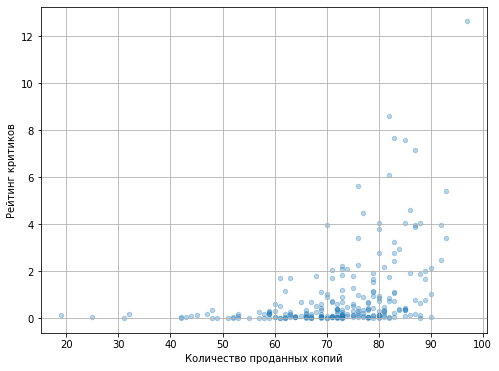

In [31]:
# строю график корреляции между количеством проданных копий игры и рейтингом критиков
games_review.plot(x='Количество проданных копий', y='Рейтинг критиков', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False, grid=True)
plt.show()


In [32]:
# посмотрим ещё на коэффициент корреляции Пирсона
games_review['Количество проданных копий'].corr(games_review['Рейтинг критиков'])

0.4026614106810408

Есть достаточно сильная положительная зависимость между рейтингом от критиков и количеством продаж. В районе 0 много значений, возможно, потому, что в исходных данных много пропусков.

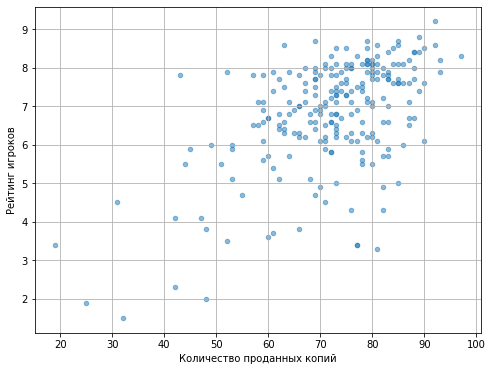

In [33]:
# строю график корреляции между количеством проданных копий игры и рейтингом игроков
games_review.plot(x='Количество проданных копий', y='Рейтинг игроков', kind='scatter', alpha=0.5, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [34]:
# посмотрим ещё на коэффициент корреляции Пирсона
games_review['Количество проданных копий'].corr(games_review['Рейтинг игроков'])

0.5464342451190306

Продажи больше зависят от рейтинга игроков, чем от рейтинга критиков. Соотнесём выводы с продажами игр на других платформах.

### Продажи vs отзывы критиков и пользователей на XOne

In [35]:
XOne_data = actual_data[actual_data['platform'] == 'XOne'].reset_index(drop=True) 
XOne_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
3,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
4,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


In [36]:
XOne_review = XOne_data.pivot_table(index='name', values=['total_sum', 'critic_score', 'user_score'])
XOne_review.columns = ['Количество проданных копий', 'Рейтинг критиков', 'Рейтинг игроков']
XOne_review = XOne_review.sort_values(by='Количество проданных копий', ascending=False)
XOne_review

,Количество проданных копий,Рейтинг критиков,Рейтинг игроков
name,,,
Grand Theft Auto V,97.0,5.47,7.9
Metal Gear Solid V: The Phantom Pain,95.0,0.75,7.3
Overwatch,91.0,1.06,5.6
The Witcher 3: Wild Hunt,91.0,1.30,9.2
Forza Horizon 3,91.0,1.08,7.4
...,...,...,...
Tomb Raider (2013),NaN,0.61,NaN
Transformer: Rise of the Dark Spark,NaN,0.11,NaN
WRC 5: FIA World Rally Championship,NaN,0.01,NaN


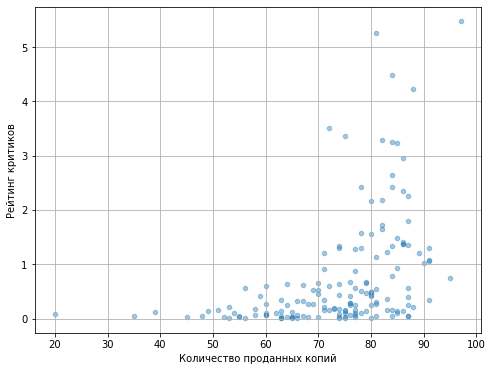

In [37]:
XOne_review.plot(x='Количество проданных копий', y='Рейтинг критиков', kind='scatter', alpha=0.4, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [38]:
# посмотрим ещё на коэффициент корреляции Пирсона
XOne_review['Количество проданных копий'].corr(XOne_review['Рейтинг критиков'])

0.4286769437033322

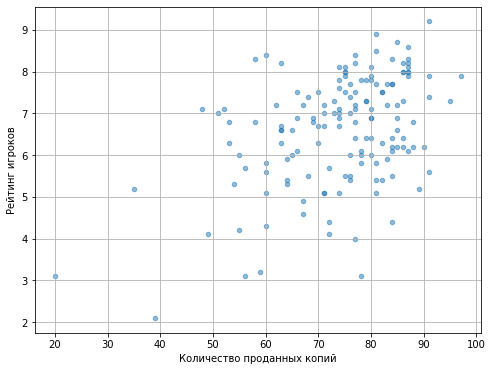

In [39]:
XOne_review.plot(x='Количество проданных копий', y='Рейтинг игроков', kind='scatter', alpha=0.5, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [40]:
# посмотрим ещё на коэффициент корреляции Пирсона
XOne_review['Количество проданных копий'].corr(XOne_review['Рейтинг игроков'])

0.44097734837644087

### Продажи vs отзывы критиков и пользователей на 3DS

In [41]:
data_3DS = actual_data[actual_data['platform'] == '3DS'].reset_index(drop=True) 
data_3DS.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
1,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unknown,7.55
2,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,unknown,7.14
3,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
4,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,unknown,3.32


In [42]:
review_3DS = data_3DS.pivot_table(index='name', values=['total_sum', 'critic_score', 'user_score'])
review_3DS.columns = ['Количество проданных копий', 'Рейтинг критиков', 'Рейтинг игроков']
review_3DS = review_3DS.sort_values(by='Количество проданных копий', ascending=False)
review_3DS

,Количество проданных копий,Рейтинг критиков,Рейтинг игроков
name,,,
Shovel Knight,90.0,0.15,8.2
The Legend of Zelda: Majora's Mask 3D,89.0,2.34,9.0
Monster Hunter 4 Ultimate,86.0,3.89,8.7
Theatrhythm Final Fantasy: Curtain Call,83.0,0.38,8.2
Persona Q: Shadow of the Labyrinth,83.0,0.72,8.1
...,...,...,...
Yokai Watch 2 Ganso/Honke,NaN,3.28,NaN
Yokai Watch 2 Shinuchi,NaN,2.68,NaN
Yokai Watch 3,NaN,1.33,NaN


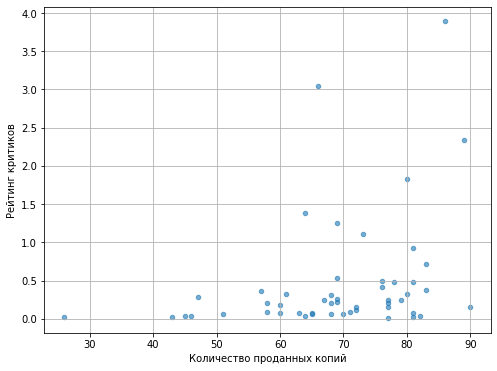

In [43]:
review_3DS.plot(x='Количество проданных копий', y='Рейтинг критиков', kind='scatter', alpha=0.6, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [44]:
# посмотрим ещё на коэффициент корреляции Пирсона
review_3DS['Количество проданных копий'].corr(review_3DS['Рейтинг критиков'])

0.314117492869051

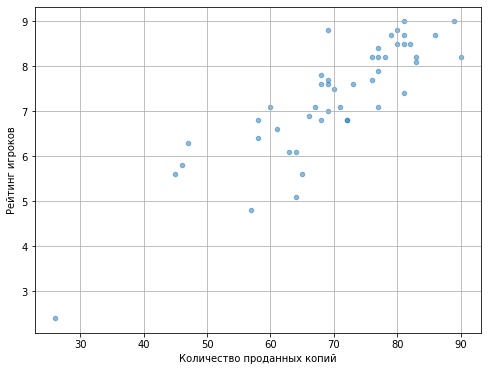

In [45]:
review_3DS.plot(x='Количество проданных копий', y='Рейтинг игроков', kind='scatter', alpha=0.5, figsize=(8, 6), sharex=False, grid=True)
plt.show()

In [46]:
# посмотрим ещё на коэффициент корреляции Пирсона
review_3DS['Количество проданных копий'].corr(review_3DS['Рейтинг игроков'])

0.862484552934546

Данные по другим играм показывают такие же зависимости продаж от рейтингов, как и продажи по самой популярной платформе.

### Распределение игр по жанрам

In [47]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sum
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


In [48]:
# строю таблицу с распределением игр и проданных копий по жанрам
data_genres = actual_data.pivot_table(index='genre', values=['name', 'total_sum'], aggfunc={'name': 'count', 'total_sum': ['sum', 'median']})
data_genres.columns = ['Количество игр в этом жанре', 'Медиана количества продаж', 'Количество проданных копий']
data_genres = data_genres.sort_values(by='Медиана количества продаж', ascending=False)
data_genres

,Количество игр в этом жанре,Медиана количества продаж,Количество проданных копий
genre,,,
Shooter,128,0.515,170.94
Sports,161,0.180,109.48
Platform,38,0.140,18.09
Fighting,60,0.125,28.22
Role-Playing,221,0.110,101.44
Simulation,44,0.100,13.13
Action,619,0.090,199.36
Misc,113,0.090,37.55
Racing,69,0.090,27.52


Пока выглядит так, что самые стабильные и при этом прибыльные жанры - шутер и спорт. По остальным значениям надо посмотреть распределения подробнее.

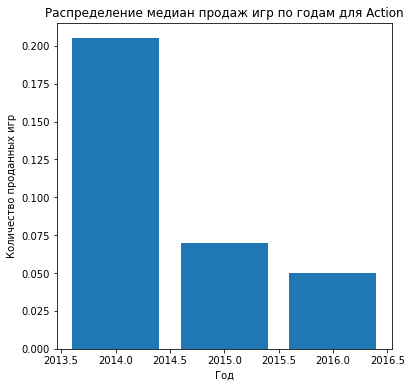

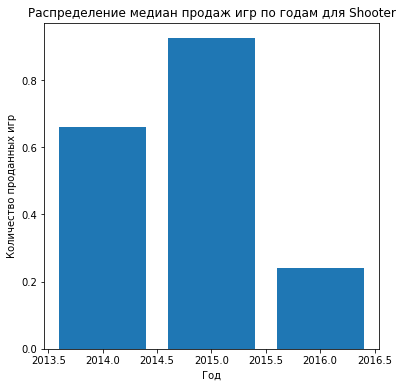

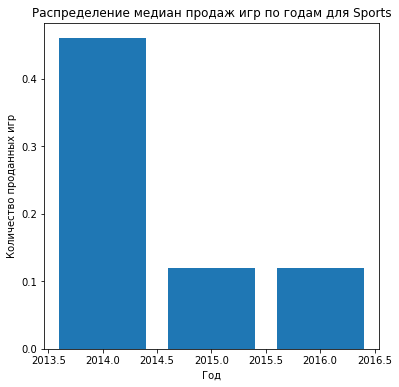

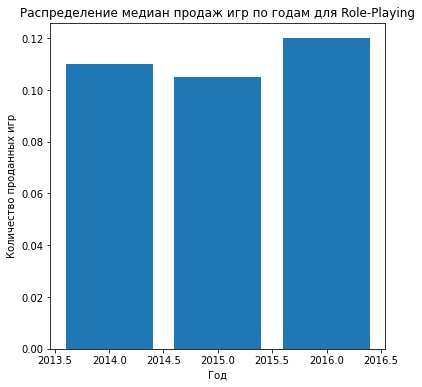

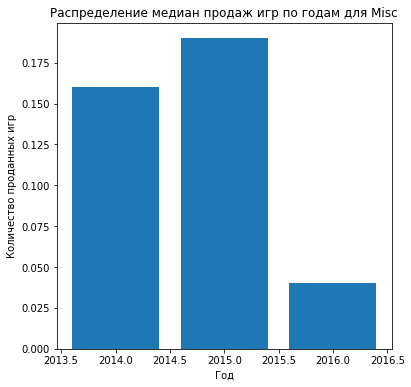

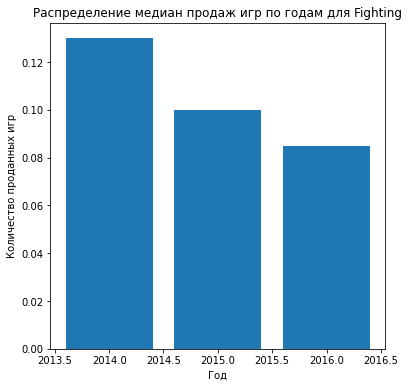

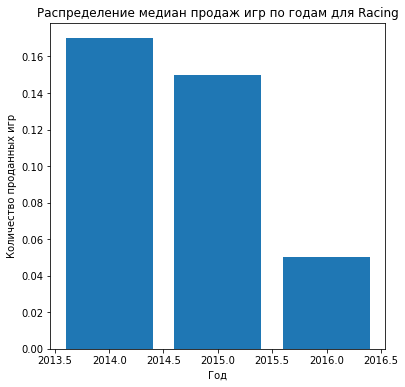

In [49]:
# срез с самыми популярными жанрами
top_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Fighting', 'Racing']
subset_2 = actual_data[actual_data['genre'].isin(top_genres)]

# строю цикл по жанрам
for genre in top_genres:
    # выделение среза данных по жанру
    genre_data = subset_2[subset_2['genre'] == genre]
    # построение таблицы с годами и количеством медианных продаж по жанру
    genre_sales = genre_data.pivot_table(index='year_of_release', values='total_sum', aggfunc='median')
    # построение гистограммы
    plot_sales_2(genre_sales, 'Год', 'Количество проданных игр', f'Распределение медиан продаж игр по годам для {genre}')


- В 2014 году продали в среднем больше 200 000 копий экшен-игр, но в 2016 году число резко снизилось — около 50 000.
- Продажи шутеров то повышаются, то снижаются. В 2014 году продали в среднем около 600 000 копий, в 2015 — около 900 000, а в 2016 — чуть больше 200 000.
- В 2014 году был пик средних продаж в жанре Sports — около 450 000, в 2015-16 годах — стабильно чуть больше 100 000 копий.
- Продажи жанра Role-playing стабильны — с 2014 по 2016 года в среднем продавалось чуть больше 100 000 копий.
- Продажи жанра Misc в 2016 году значительно упали. В 2014-15 годах продавали в среднем больше 150 000 копий, но в 2016 — меньше 50 000.
- Продажи жанра Fighting к 2016 году снижаются — в среднем более 120 000 в 2014 годах, но в 2016 году — уже меньше 100 000.
- Продажи жанра Racing тоже снижаются: в 2014 году — около 160 000 продаж в среднем, но уже в 2016 году — около 50 000.

## Портрет пользователя каждого региона

### Портрет пользователя из NA

In [50]:
# строю таблицу по продажам по платформам

na_platforms = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_platforms

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
WiiU    19.36
PC       7.23
PSV      2.52
Wii      2.08
PSP      0.00
Name: na_sales, dtype: float64

In [51]:
# выделяю топ платформ по продажам
na_platforms = pd.concat([na_platforms[:5], pd.Series(na_platforms[5:].sum(), index=['Другие платформы'])])
na_platforms


PS4                 98.61
XOne                81.27
X360                28.30
3DS                 22.64
PS3                 22.05
Другие платформы    31.19
dtype: float64

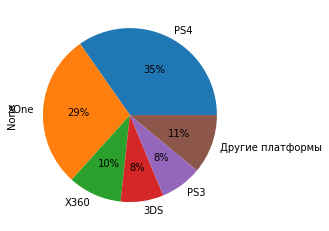

In [52]:
# изучаю распределение платформ по продажам
na_platforms.plot(kind='pie', autopct='%.0f%%')
plt.show()

Самые популярные платформы в Северной Америке - PS4 и XOne. 

In [53]:
# строю таблицу по продажам по жанрам
na_genres = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genres = pd.concat([na_genres[:5], pd.Series(na_genres[5:].sum(), index=['Другие жанры'])])
na_genres

Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Другие жанры    37.86
dtype: float64

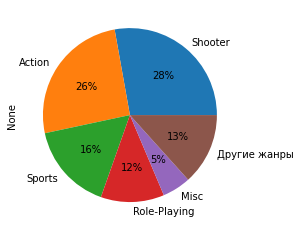

In [54]:
# изучаю распределение жанров по продажам
na_genres.plot(kind='pie', autopct='%.0f%%')
plt.show()

Самые популярные жанры в Северной Америке - шутер, экшен и спорт.

In [55]:
# строю таблицу по продажам по рейтингу ESRB
na_esrb = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_esrb.columns = ['Количество продаж']
na_esrb = na_esrb.sort_values(by='Количество продаж', ascending=False)
na_esrb

,Количество продаж
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


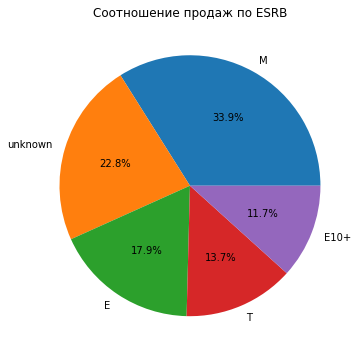

In [56]:
# изучаю распределение рейтинга по продажам
plt.figure(figsize=(6, 6))
plt.pie(na_esrb['Количество продаж'], labels=na_esrb.index, autopct='%1.1f%%')
plt.title('Cоотношение продаж по ESRB')
plt.show()

Популярность рейтинга M («для взрослых») соотносится с популярностью жанров - экшен и шутеры. Второй по популярности рейтинг неизвестен. Можно пока предположить, что рейтинг ESRB не влияет на успешность игры. 

### Портрет пользователя из EU

In [57]:
eu_platforms = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_platforms = pd.concat([eu_platforms[:5], pd.Series(eu_platforms[5:].sum(), index=['Другие платформы'])])
eu_platforms

PS4                 130.04
XOne                 46.25
PS3                  25.54
PC                   17.97
3DS                  16.12
Другие платформы     34.76
dtype: float64

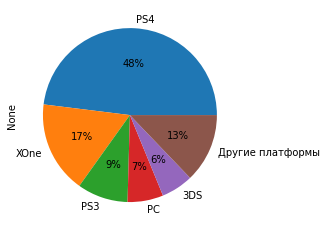

In [58]:
eu_platforms.plot(kind='pie', autopct='%.0f%%')
plt.show()

Самая популярная платформа в Европе - PS4. XOne сильно уступает ей по продажам. 

In [59]:
eu_genres = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genres = pd.concat([eu_genres[:5], pd.Series(eu_genres[5:].sum(), index=['Другие жанры'])])
eu_genres

Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Другие жанры    42.45
dtype: float64

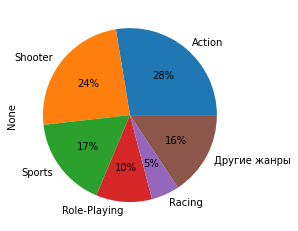

In [60]:
eu_genres.plot(kind='pie', autopct='%.0f%%')
plt.show()

Самые популярные жанры в Европе - шутер и экшен. Спорт тоже популярен, но почти в два раза меньше. 

In [61]:
eu_esrb = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_esrb.columns = ['Количество продаж']
eu_esrb = eu_esrb.sort_values(by='Количество продаж', ascending=False)
eu_esrb

,Количество продаж
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


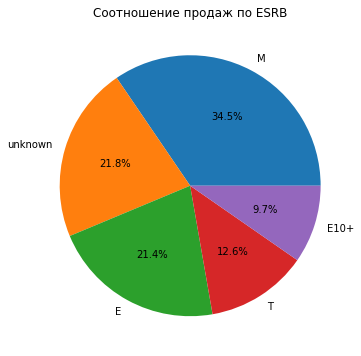

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(eu_esrb['Количество продаж'], labels=eu_esrb.index, autopct='%1.1f%%')
plt.title('Cоотношение продаж по ESRB')
plt.show()

Популярность рейтинга M («для взрослых») и тут соотносится с популярностью жанров - экшен и шутеры. Второй по популярности рейтинг неизвестен.

### Портрет пользователя из JP

In [63]:
jp_platforms = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_platforms = pd.concat([jp_platforms[:5], pd.Series(jp_platforms[5:].sum(), index=['Другие платформы'])])
jp_platforms

3DS                 44.24
PS4                 15.02
PSV                 14.54
PS3                 11.22
WiiU                 7.31
Другие платформы     0.76
dtype: float64

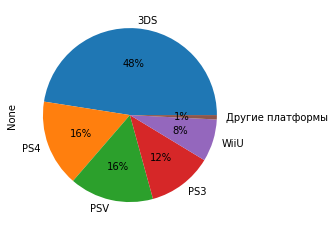

In [64]:
jp_platforms.plot(kind='pie', autopct='%.0f%%')
plt.show()

В Японии популярна 3DS, что не удивительно - это приставка от Nintendo.

In [65]:
jp_genres = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genres = pd.concat([jp_genres[:5], pd.Series(jp_genres[5:].sum(), index=['Другие жанры'])])
jp_genres

Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Другие жанры    15.50
dtype: float64

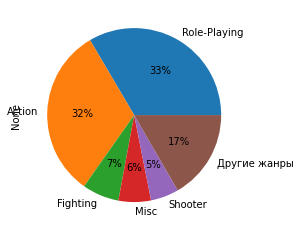

In [66]:
jp_genres.plot(kind='pie', autopct='%.0f%%')
plt.show()

Здесь показатели по жанрам чуть отличаются от показателям по Америке и Европе. Популярны ролевые игры и экшены. Шутер - один из самых непопулярных жанров. Возможно, это объясняется тем, что для 3DS не выходит много шутеров.

In [67]:
jp_esrb = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_esrb.columns = ['Количество продаж']
jp_esrb = jp_esrb.sort_values(by='Количество продаж', ascending=False)
jp_esrb

,Количество продаж
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


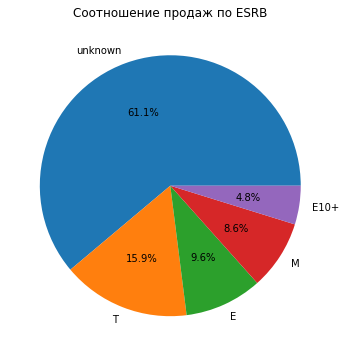

In [68]:
plt.figure(figsize=(6, 6))
plt.pie(jp_esrb['Количество продаж'], labels=jp_esrb.index, autopct='%1.1f%%')
plt.title('Cоотношение продаж по ESRB')
plt.show()

Этот график совсем подтверждает, что успешность игр не зависит от рейтинга ESRB.

## Проверка гипотез

### Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?

Нулевая гипотеза: пользовательские рейтинги платформ одинаковые.
Альтернативная гипотеза: пользовательские рейтинги разные.

In [69]:
# выделяю срезы с рейтингами по платформам PC и Xbox One

pc_rating = actual_data[actual_data['platform'] == 'PC']['user_score'].dropna()

xone_rating = actual_data[actual_data['platform'] == 'XOne']['user_score'].dropna()


alpha = 0.05 # указала уровень стат. значимости

# провожу t-тест для двух выборок, альтернативу не указываю, по умолчанию будет 'two-side'
results = st.ttest_ind(pc_rating, xone_rating)

print(f'p-value: {results.pvalue}')

# проверяю p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Тест показывает, что средний рейтинг игроков по платформам PC и Xbox One одинаковый.

In [70]:
pc_rating_mean = pc_rating.mean()
xone_rating_mean = xone_rating.mean()

print("Средний рейтинг пользователей для PC: ", pc_rating_mean)
print("Средний рейтинг пользователей для XOne: ", xone_rating_mean)


Средний рейтинг пользователей для PC:  6.298360655737705
Средний рейтинг пользователей для XOne:  6.594545454545456


### Разные ли средние пользовательские рейтинги жанров Action и Sports?

Нулевая гипотеза: пользовательские рейтинги жанров одинаковые.
Альтернативная гипотеза: пользовательские рейтинги разные.

In [71]:
# выделяю срезы с рейтингами по жанрам Action и Sports
action_rating = actual_data[actual_data['genre'] == 'Action']['user_score'].dropna()

sports_rating = actual_data[actual_data['genre'] == 'Sports']['user_score'].dropna()


alpha = 0.05 # указала уровень стат. значимости

# провожу t-тест для двух выборок, альтернативу не указываю, по умолчанию будет 'two-side'
results = st.ttest_ind(action_rating, sports_rating)

print(f'p-value: {results.pvalue}')

# проверяю p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Тест показывает, что средний рейтинг игроков по жанрам Action и Sports разный.

In [72]:
action_rating_mean = action_rating.mean()
sports_rating_mean = sports_rating.mean()

print("Средний рейтинг пользователей для Action: ", action_rating_mean)
print("Средний рейтинг пользователей для Sports: ", sports_rating_mean)

Средний рейтинг пользователей для Action:  6.760606060606061
Средний рейтинг пользователей для Sports:  5.2251968503937


# Общий вывод

## Предобработка данных

- В данных было некоторое количество пропусков. Заполнила их следующим образом:
    - name - строки с пропущенными названиями игр удалила, значений было всего 2.
    - year_of_release - нельзя заполнить логически, но данных немного, поэтому такие строки тоже удалила.
    - genre - эти строки тоже удалила, значений всего 2. Скорее всего, это ещё те две игры, которые без названия.
    - critic_score - нельзя заполнить логически, оставила пропуски.
    - user_score - нельзя заполнить логически, оставила пропуски.
    - rating - это категориальная переменная, поэтому заменила пропуски на значение 'unknown'.
    
    В целом было достаточно много пропусков по рейтингам игр. В целом, пользовательский рейтинг и рейтинг от критиков может быть не заполнен просто потому, что эту игру действительно не оценивали. Можно ещё попробовать поискать другие источники или как-то стимулировать своих пользователей давать отзывы играм. Нули в столбце с рейтингом ESRB могут быть из-за того, что этот рейтинг появился только в 1994 году. Много игр до этого года, возможно, без рейтинга. Ну, и тут тоже стоит проверить источник. Всё-таки рейтинг ESRB более официальный, чем оценка от игроков и критиков, странно, что его так много где нет. Пропуски в годах выпуска могут возникнуть из-за человеческого фактора (просто забыли указать) или опять-таки какие-то проблемы с источником.
    
- Добавила столбец с глобальными продажами по играм.

## Исследование данных

- С 1995 года индустрия компьютерных игр пошла в гору. Прирост количества игр с 1994 года - почти в два раза.
- В среднем платформы живут по 10-11 лет. Но новые версии приставок выходят достаточно быстро, поэтому особенно прибыльными платформы остаются 3-4 года. Чтобы делать прогнозы на следующий год, лучше брать данные по играм за последние 2-3 года. Чтобы сделать прогноз на 2017 год, сделала срез по данным за 2014-2016 года. Если бы данные за 2016 год были полными, то можно было бы обойтись только двумя годами.

### Потенциально прибыльные платформы

- Потенциально прибыльные платформы - PS4, XOne, 3DS, WiiU:
    - Продажи по PS4 в 2014 году превысили 1 300 000 продаж. Это самый высокий показатель среди платформ. В 2016 году продажи гораздо ниже - около 400 000, но это всё равно высокий показатель относительно других платформ.
    - Продажи по 3DS в 2014 были выше 500 000, но затем пошли на спад. Однако в 2016 заметен небольшой подъём по сравнению с 2015 годом — ближе к 350 000.
    - Продажи по XOne в 2014 году были высокими — больше 800 000, но в 2016 слишком резкий спад — около 300 000 проданных копий.
    - Продажи по WiiU в 2014 — около 700 000, затем постепенный спад. В 2016 году продано чуть больше 300 000 игр.
- На ящиках PS4 и XOne много выбросов, что говорит о том, что люди готовы покупать игры именно для этих приставок. 3DS тоже показывает много выбросов, но тут надо быть аккуратнее, потому что портативные приставки теряют актуальность как будто чуть быстрее, чем не портативные.

### Прибыльные жанры

Самые стабильный и прибыльный жанр - шутер. Стабильны продажи спортивных и ролевых игр. У экшена бывают пики продаж, но на них опаснее полагаться.

- Продажи шутеров то повышаются, то снижаются. В 2014 году продали в среднем около 600 000 копий, в 2015 — около 900 000, а в 2016 — чуть больше 200 000.
- В 2014 году был пик средних продаж в жанре Sports — около 450 000, в 2015-16 годах — стабильно чуть больше 100 000 копий.
- Продажи жанра Role-playing стабильны — с 2014 по 2016 года в среднем продавалось чуть больше 100 000 копий.

### Портреты пользователей по странам

- Самые популярные платформы в Северной Америке - PS4 и XOne. Самые популярные жанры - шутер, экшен и спорт.
- Самая популярная платформа в Европе - PS4. XOne сильно уступает ей по продажам. Самые популярные жанры - шутер и экшен. Спорт тоже популярен, но почти в два раза меньше.
- В Японии популярна 3DS, что не удивительно - это приставка от Nintendo. Здесь показатели по жанрам чуть отличаются от показателям по Америке и Европе. Популярны ролевые игры и экшены. Шутер - один из самых непопулярных жанров. Возможно, это объясняется тем, что для 3DS не выходит много шутеров.

Средний рейтинг игроков по платформам PC и Xbox One одинаковый, средний рейтинг игроков по жанрам Action и Sports разный.

## Выводы по успешности игр на 2017 год

- Игры, которые выходят для более новых приставок, популярнее чем те, которые выходят для устаревших консолей. В 2017 году я бы ориентировалась на игры для PS4, XOne, 3DS, WiiU. PS4 и XOne будут популярны в Америке и Европе, а 3DS и WiiU традиционно в Японии.
- Спорт, шутеры и экшен игры стабильно популярные жанры с небольшой поправкой на Японию. В 2017 году можно сделать ставку на эти жанры. А для Японии — вместо шутеров ролевые игры.
- Есть достаточно сильная положительная зависимость между рейтингом от критиков и количеством продаж. Но продажи больше зависят от рейтинга игроков, чем от рейтинга критиков. Поэтому стоит стимулировать игроков давать отзывы на игры. Положительные отзывы от пользователей повышают продаваемость игры.
- Успешность игр не зависит от рейтинга ESRB.